In [1]:

import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
import plotly.express as px
import datetime
import datetime as dt
import time

cmap = sns.diverging_palette(220, 15, as_cmap=True)


# Supress Scientific notation in python
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display all columns of long dataframe
pd.set_option('display.max_columns', None)


My business needed to analyse bike sharing evolution given several factors
- weather conditions
- working days
- humidity
- windspeed
Based on these graphs, the manager should take decisions when is it best to refill bike stocks, change sharing fees and change working hours of the business.  

In [2]:
#open file
business='metrics.csv'
df=pd.read_csv(business)
print(df.head(3))

   id      date  season  holiday  weekday  workingday  weathersit  temp  \
0   1  1/1/2011       1        0        6           0           2  0.34   
1   2  1/2/2011       1        0        0           0           2  0.36   
2   3  1/3/2011       1        0        1           1           1  0.20   

   atemp  hum  windspeed  casual  registered   cnt  
0   0.36 0.81       0.16     331         654   985  
1   0.35 0.70       0.25     131         670   801  
2   0.19 0.44       0.25     120        1229  1349  


In [3]:
#parse index
df['date']=pd.to_datetime(df['date'], infer_datetime_format=True)
indexeddf=df.set_index(['date'])
#print(indexeddf)


#parsing to time format and extracting dates with 'created_at'
x=df['date']=pd.to_datetime(df['date'], format='%m-%d-%y')

Day=df['date'].dt.day_name()
Month=df['date'].dt.month_name()
Year=df['date'].dt.year

#subsetting timeseries
df['Year']=df['date'].dt.year
df['Month']=df['date'].dt.month_name()
df['Day']=df['date'].dt.day

print(df.head(5))

   id       date  season  holiday  weekday  workingday  weathersit  temp  \
0   1 2011-01-01       1        0        6           0           2  0.34   
1   2 2011-01-02       1        0        0           0           2  0.36   
2   3 2011-01-03       1        0        1           1           1  0.20   
3   4 2011-01-04       1        0        2           1           1  0.20   
4   5 2011-01-05       1        0        3           1           1  0.23   

   atemp  hum  windspeed  casual  registered   cnt  Year    Month  Day  
0   0.36 0.81       0.16     331         654   985  2011  January    1  
1   0.35 0.70       0.25     131         670   801  2011  January    2  
2   0.19 0.44       0.25     120        1229  1349  2011  January    3  
3   0.21 0.59       0.16     108        1454  1562  2011  January    4  
4   0.23 0.44       0.19      82        1518  1600  2011  January    5  


# Weekly mean bike shared

In [4]:
#index per week

#day_index per week 'D' 
#week_index=indexeddf.resample('W').mean()
#print(week_index.head(7))


In [5]:
#week_index.plot()

# Bike sharing changes in weather conditions

In [6]:
#subplot 

f,axes = plt.subplots(1,2, figsize=(20, 10))
C=sns.scatterplot(week_index.hum, week_index.windspeed, s=100, edgecolor='black', alpha=0.5,\
     palette='Blues',ax=axes[0]).set_title("Weekly mean of bikes haring in air conditions")

D=sns.scatterplot(week_index.temp , week_index.atemp, s=100, edgecolor='black', alpha=0.5,\
     palette='Blues',ax=axes[1]).set_title("weekly mean of bike sharing in weather conditions")

plt.show()

NameError: name 'week_index' is not defined

In [ ]:
df.head(3)

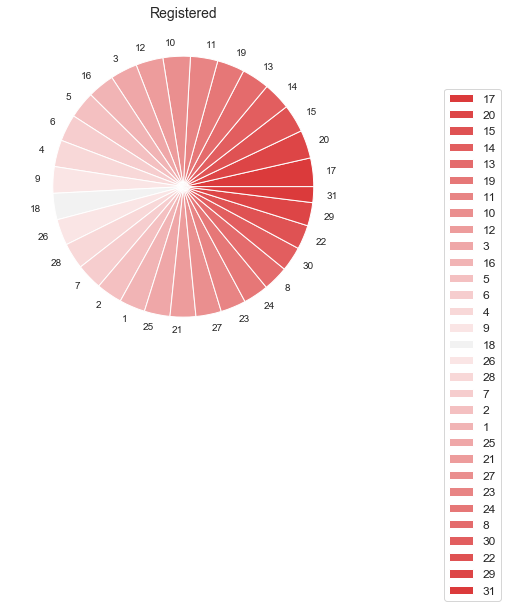

In [32]:

cmap1 = sns.diverging_palette(17, 15, as_cmap=True)


#pie chart 

sns.set_style("whitegrid")
df = df.groupby('Day').agg({'registered': 'sum'}).sort_values('registered', ascending=False)


ax = df.plot.pie(y='registered', figsize=(6, 6), colormap=sns.diverging_palette(12, 12, as_cmap=True))
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.3, 0.8), loc=2, borderaxespad=0., fontsize=12)
plt.ylabel(' ')
plt.title('Registered', fontsize=14)
plt.show()